In [1]:
from pandas import DataFrame, read_csv;

import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

car_prices = pd.read_csv('CarPrice_Assignment.csv')

#############derive the company name##############

car_prices["company_name"] = car_prices.CarName.str.split(" ").str.get(0)

#### Rename the cars which does not have proper names
car_prices.loc[car_prices["company_name"] == "toyouta", "company_name"] = "toyota"
car_prices.loc[car_prices["company_name"] == "porcshce", "company_name"] = "porsche"
car_prices.loc[car_prices["company_name"] == "vokswagen", "company_name"] = "volkswagen"
car_prices.loc[car_prices["company_name"] == "vw", "company_name"] = "volkswagen"
car_prices.loc[car_prices["company_name"] == "maxda", "company_name"] = "mazda"
car_prices.loc[car_prices["enginetype"] == "dohcv", "enginetype"] = "dohc"


car_prices["company_name"] = car_prices["company_name"].str.upper();

###########binary categorical variables
car_prices['fueltype'] = car_prices['fueltype'].map({'gas': 1, 'diesel': 0})
car_prices['aspiration'] = car_prices['aspiration'].map({'std': 1, 'turbo': 0})
car_prices['doornumber'] = car_prices['doornumber'].map({'two': 2, 'four': 4})
car_prices['enginelocation'] = car_prices['enginelocation'].map({'front': 1, 'rear': 0})

car_prices.drop(['car_ID'],axis=1,inplace=True)
car_prices.drop(['CarName'],axis=1,inplace=True)

#######create dummy variable for carbody column ##########

## If all are zero, then it means that its convertible
car_body_dummies = pd.get_dummies(car_prices['carbody'], drop_first=True)
car_prices = pd.concat([car_prices,car_body_dummies],axis=1)
car_prices.drop(['carbody'],axis=1,inplace=True)

#######create dummy variable for drivewheel column ##########

## If all are zero, then it means that its 4wd
car_drive_wheels = pd.get_dummies(car_prices['drivewheel'], drop_first=True)
car_prices = pd.concat([car_prices,car_drive_wheels],axis=1)
car_prices.drop(['drivewheel'],axis=1,inplace=True)


#######create dummy variable for enginetype column ##########

## If all are zero, then it means that its dohc
car_enginetypes = pd.get_dummies(car_prices['enginetype'], drop_first=True)
car_prices = pd.concat([car_prices,car_enginetypes],axis=1)
car_prices.drop(['enginetype'],axis=1,inplace=True)


#######create dummy variable for cylindernumber column ##########

## If all are zero, then it means that its eight
car_cylindernumber = pd.get_dummies(car_prices['cylindernumber'], drop_first=True)
car_prices = pd.concat([car_prices,car_cylindernumber],axis=1)
car_prices.drop(['cylindernumber'],axis=1,inplace=True)


#######create dummy variable for fuelsystem column ##########

## If all are zero, then it means that its 1bbl
car_fuelsystem = pd.get_dummies(car_prices['fuelsystem'], drop_first=True)
car_prices = pd.concat([car_prices,car_fuelsystem] ,axis=1)
car_prices.drop(['fuelsystem'],axis=1,inplace=True)

#######create dummy variable for company_name column ##########

## If all are zero, then it means that its ALFA-ROMERO
car_company_name = pd.get_dummies(car_prices['company_name'], drop_first=True)
car_prices = pd.concat([car_prices,car_company_name] ,axis=1)
car_prices.drop(['company_name'],axis=1,inplace=True)

def normalize (x):
    return ((x-np.mean(x))/(max(x) - min(x)))

car_prices = car_prices.apply(normalize)

y = car_prices['price']

X = car_prices[['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five',
       'four', 'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi','mfi', 'mpfi', 'spdi', 'spfi', 'AUDI', 'BMW', 'BUICK',
       'CHEVROLET', 'DODGE', 'HONDA', 'ISUZU', 'JAGUAR', 'MAZDA','MERCURY', 'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH',
       'PORSCHE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA', 'VOLKSWAGEN','VOLVO']]



#random_state is the seed used by the random number generator, it can be any integer.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

lm = LinearRegression()
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]


#function for calculating VIF
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)


## Basically here I have copy-pasted columns from rfe.support_ variable
final_car_prices = car_prices[['enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'rotor', 'five', 'four', 'three',
       'twelve', 'two', 'BMW', 'PEUGEOT', 'PORSCHE', 'price']]


[False False False False  True False False  True False  True  True  True
  True False False False False False False False False False False False
 False False False False  True  True  True False  True  True  True False
 False False False False False False False  True False False False False
 False False False False False False  True False  True False False False
 False False False]
[44 15 17 40  1  8  3  1  9  1  1  1  1 20 43 11 28 18 22 21 23 24 45 38
  2 37  6 30  1  1  1 46  1  1  1 41 27 12 47 29 25 48 42  1 39 19 14 13
 32 26 36 49 10 35  1 16  1 31  4  7 34 33  5]


/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


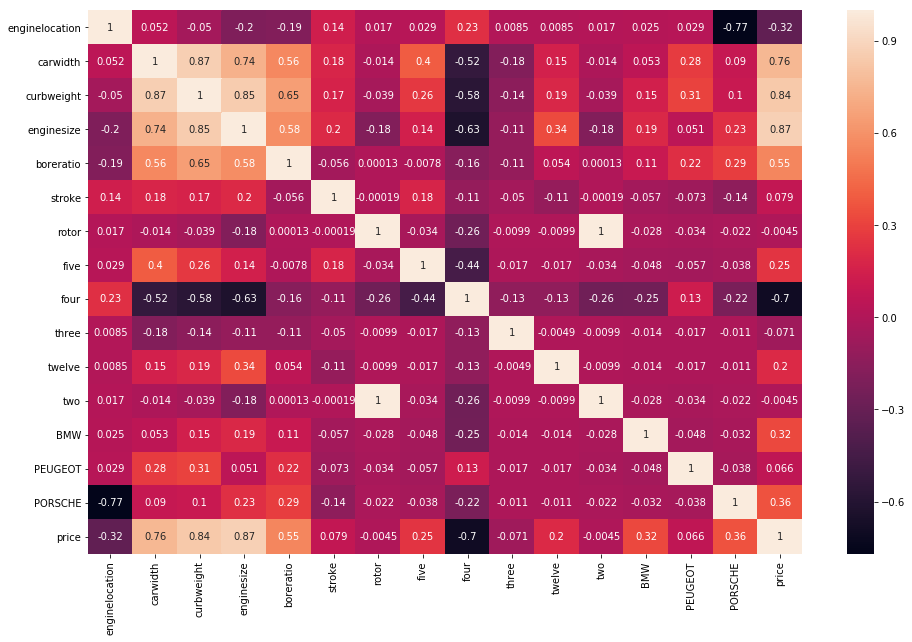

In [2]:
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(final_car_prices.corr(), annot = True)

In [3]:

###########################Model 1#################
X_train_rfe = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train, X_train_rfe).fit()

print(lm1.summary())

print(vif_cal(input_data=final_car_prices, dependent_col="price"))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.03e-70
Time:                        22:46:41   Log-Likelihood:                 232.74
No. Observations:                 143   AIC:                            -435.5
Df Residuals:                     128   BIC:                            -391.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0047      0.004      1.

/usr/local/Cellar/ipython@5/5.6.0/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:122: RuntimeWarning: divide by zero encountered in double_scalars


In [4]:
###########################Model 2 ################
X_train_rfe = X_train_rfe.drop(['two'], axis=1)

lm2 = sm.OLS(y_train, X_train_rfe).fit()

print(lm2.summary())

print(vif_cal(input_data=final_car_prices.drop(["two"], axis=1), dependent_col="price"))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.03e-70
Time:                        22:46:41   Log-Likelihood:                 232.74
No. Observations:                 143   AIC:                            -435.5
Df Residuals:                     128   BIC:                            -391.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0047      0.004      1.

In [5]:
###########################Model 3 ################
X_train_rfe = X_train_rfe.drop('enginesize', 1)

lm3= sm.OLS(y_train, X_train_rfe).fit()

print(lm3.summary())

print(vif_cal(input_data=final_car_prices.drop(["enginesize", "two"], axis=1), dependent_col="price"))


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           5.01e-61
Time:                        22:46:41   Log-Likelihood:                 205.02
No. Observations:                 143   AIC:                            -382.0
Df Residuals:                     129   BIC:                            -340.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0005      0.005      0.

In [6]:
###########################Model 4 ################
X_train_rfe = X_train_rfe.drop('four', 1)

lm4= sm.OLS(y_train, X_train_rfe).fit()

print(lm4.summary())

print(vif_cal(input_data=final_car_prices.drop(["enginesize", "two", 'four'], axis=1), dependent_col="price"))


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           4.72e-62
Time:                        22:46:42   Log-Likelihood:                 205.00
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     130   BIC:                            -345.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0006      0.005      0.

In [7]:
###########################Model 5 ################

X_train_rfe = X_train_rfe.drop('five', 1)

lm5= sm.OLS(y_train, X_train_rfe).fit()

print(lm5.summary())

print(vif_cal(input_data=final_car_prices.drop(['five',"enginesize", "two", 'four'], axis=1), dependent_col="price"))


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.4
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           4.37e-63
Time:                        22:46:42   Log-Likelihood:                 204.95
No. Observations:                 143   AIC:                            -385.9
Df Residuals:                     131   BIC:                            -350.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0005      0.005      0.

In [8]:
###########################Model 6 ################

X_train_rfe = X_train_rfe.drop('stroke', 1)

lm6= sm.OLS(y_train, X_train_rfe).fit()

print(lm6.summary())

print(vif_cal(input_data=final_car_prices.drop(['five',"enginesize", "two", 'four', 'stroke'], axis=1), dependent_col="price"))


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           4.72e-64
Time:                        22:46:42   Log-Likelihood:                 204.68
No. Observations:                 143   AIC:                            -387.4
Df Residuals:                     132   BIC:                            -354.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0006      0.005      0.

In [9]:
###########################Model 7 ################
X_train_rfe = X_train_rfe.drop('rotor', 1)

lm7= sm.OLS(y_train, X_train_rfe).fit()

print(lm7.summary())

print(vif_cal(input_data=final_car_prices.drop(['five',"enginesize", "two", 'four', 'stroke', 'rotor'], axis=1), dependent_col="price"))


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.09e-64
Time:                        22:46:42   Log-Likelihood:                 203.52
No. Observations:                 143   AIC:                            -387.0
Df Residuals:                     133   BIC:                            -357.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0011      0.005      0.

In [10]:
##########################Model 8 ################

X_train_rfe = X_train_rfe.drop('carwidth', 1)

lm8= sm.OLS(y_train, X_train_rfe).fit()

print(lm8.summary())

print(vif_cal(input_data=final_car_prices.drop(['five',"enginesize", "two", 'four', 'stroke', 'rotor', 'carwidth'], axis=1), dependent_col="price"))


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           5.28e-60
Time:                        22:46:42   Log-Likelihood:                 189.17
No. Observations:                 143   AIC:                            -360.3
Df Residuals:                     134   BIC:                            -333.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0003      0.006      0.

In [11]:
##########################Model 9 ################

X_train_rfe = X_train_rfe.drop('boreratio', 1)

lm9= sm.OLS(y_train, X_train_rfe).fit()

print(lm9.summary())

print(vif_cal(input_data=final_car_prices.drop(['boreratio','five',"enginesize", "two", 'four', 'stroke', 'rotor', 'carwidth'], axis=1), dependent_col="price"))


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.97e-60
Time:                        22:46:42   Log-Likelihood:                 187.50
No. Observations:                 143   AIC:                            -359.0
Df Residuals:                     135   BIC:                            -335.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0012      0.006      0.

In [12]:
##########################Model 10 ################

X_train_rfe = X_train_rfe.drop('PORSCHE', 1)

lm10= sm.OLS(y_train, X_train_rfe).fit()

print(lm10.summary())

print(vif_cal(input_data=final_car_prices.drop(['PORSCHE','boreratio','five',"enginesize", "two", 'four', 'stroke', 'rotor', 'carwidth'], axis=1), dependent_col="price"))


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     156.2
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.80e-58
Time:                        22:46:42   Log-Likelihood:                 179.95
No. Observations:                 143   AIC:                            -345.9
Df Residuals:                     136   BIC:                            -325.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0021      0.006      0.

In [13]:
##########################Model 11 ################

X_train_rfe = X_train_rfe.drop('three', 1)

lm11= sm.OLS(y_train, X_train_rfe).fit()

print(lm11.summary())

print(vif_cal(input_data=final_car_prices.drop(['three','PORSCHE','boreratio','five',"enginesize", "two", 'four', 'stroke', 'rotor', 'carwidth'], axis=1), dependent_col="price"))
print(X_train_rfe.shape)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     183.4
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           7.13e-59
Time:                        22:46:42   Log-Likelihood:                 178.12
No. Observations:                 143   AIC:                            -344.2
Df Residuals:                     137   BIC:                            -326.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0023      0.006      0.

Text(0,0.5,'Car Price')

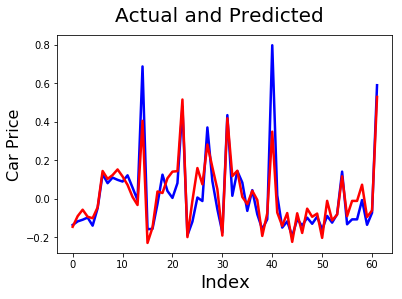

In [14]:
%matplotlib inline

X_test = X_test[['enginelocation', 'curbweight', 'twelve', 'BMW', 'PEUGEOT']]
X_test = sm.add_constant(X_test,has_constant='add')
y_pred = lm11.predict(X_test)

 # Actual vs Predicted
c = [i for i in range(0,62,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Car Price', fontsize=16)                     

Text(0,0.5,'ytest-ypred')

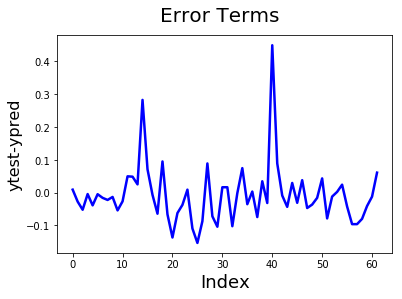

In [15]:
c = [i for i in range(0,62,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)

Text(0,0.5,'y_pred')

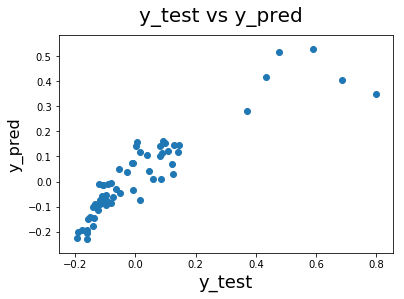

In [16]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Index')

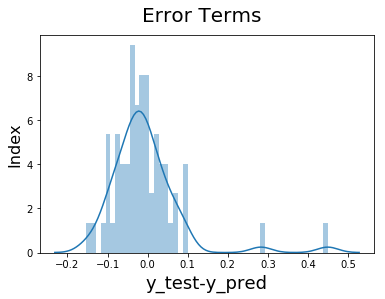

In [17]:
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)

In [18]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('RMSE :', 0.0892824203316999)
